# Support Vector Machine classifiers (1.5 points)

In this assignment, we use the scikit-learn package to train an SVM classifier. You will use cross-validation to determine the best combination of values for the two hyperparameters used in SVM: the cost, C, and precision, gamma.

 - Question 1 (.9) Choosing a Gaussian kernel for the SVM, use 10-fold cross-validation to evaluate the cost and precision parameters (respectively named *C* and *gamma* in the documentation of the *sklearn.svm.SVC* class). The range of values for each parameters are given to you. Visualize the cross-validation error (as a function of the 2 SVM parameters) using *imshow*.  

 - Question 2 (.5) Plot the decision boundaries, by appropriately modifying the code from the previous exercises. Display the support vectors on the same figure.
 
 - Question 3 (.1) Using the svm model you trained with the best combination of cost and precision, evaluate the classifier's generalization error on the test-set by showing the number of misclassified points.

# Code

## Imports

In [1]:
# Import all necessary modules. 

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC

## Load and display the training data

(500, 2)
(500,)


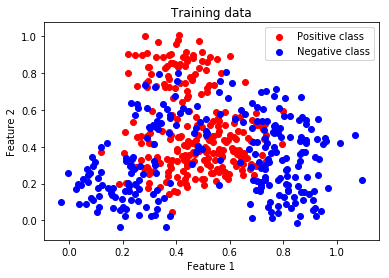

In [2]:
features = np.load("features.npy")
labels = np.load("labels.npy")
print(features.shape)
print(labels.shape)

# Display data
pos = labels == 1
neg = labels != 1
fig, ax = plt.subplots()
ax.scatter(features[pos, 0], features[pos, 1], c="r", label="Positive class")
ax.scatter(features[neg, 0], features[neg, 1], c="b", label="Negative class")
ax.set_title("Training data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

plt.show()

## Training with K-fold cross-validation

### Define test values for the cost and precision parameters 

In [3]:
def logsample(start, end, num):
    return np.logspace(np.log10(start), np.log10(end), num, base=10.0)

num_gammas = 20
num_costs = 20
gamma_range = logsample(1e-1, 1e3, num_gammas)
cost_range = logsample(1e-1, 1e3, num_costs)

### Compute error for each parameter combination

The function KFold from the scikit-learn library is initialising a "cross-validation" object with as argument the number of fold $F$ (here $F=10$). You can then use the object created to obtain partition your input data randomly into train sets and validation sets. For example, if you initialise your partitioner as $\verb+ kf= KFold(n_splits=F)+$, then calling $\verb+kf.split(input-data)+$ on your input data will generate a list of $F$ partitions. Each partition has two elements, the first one gives you the indices of the training data, the second the indices of the validation data (the indices refer back to your original input data).

To compute SVM, you need to initialise a SVM object with the $\verb+SVC+$ function with inputs: the hyperparameters, C and gamma, and the type of kernel you want to use ('rbf' for gaussian). For instance:  $\verb+svm=SVC(C=C,gamma=gamma,kernel='rbf')+$. To train the SVM  model on the training set, call the function $\verb+svm.fit()+$ with inputs: the features and labels of the training set. Once trained, use the SVM model to classify the validation data based on their features by using the $\verb+svm.predict()+$ function. The error coresponds to the number of mislabeled data between the prediction and the ground truth given by the labels of the validation data,the lower the error the better the model.
                

In [4]:
K = 10  # number of folds for cross validation
kf = KFold(n_splits=K)
cv_error = np.zeros((num_gammas, num_costs))  # error matrix


# TODO (Question 1)
for i in range(len(gamma_range)):
    for j in range(len(cost_range)):
        mislabled=[]
        for train_index,test_index in kf.split(features):
            #print("TRAIN:", train_index, "TEST:", test_index)
            svm=SVC(C=cost_range[j],gamma=gamma_range[i],kernel='rbf')
            train_x=features[train_index]
            train_y=labels[train_index]
            test_x=features[test_index]
            test_y=labels[test_index]
            svm.fit(train_x,train_y)           
            predict_y=svm.predict(test_x)            
            mis=0
            for z in range(len(test_index)):
                if test_y[z] != predict_y[z]:
                    mis+=1
            mislabled.append(mis)
            #print(mislabled)
        error=sum(mislabled)/len(mislabled)
        cv_error[i,j]=error
        #print(error)


### Train the classifier with the best parameter combination

In [6]:
#test
mini=[]
for i in range(len(gamma_range)):
    m=min(cv_error[i])
    mini.append(m)
m=min(mini)
r=mini.index(m)
c=0
for j in range(len(cv_error[r])):
    if cv_error[r][j]==m:
        c=j
gamma=gamma_range[r]

In [5]:
# Find gamma and cost giving the smallest error
# TODO (Question 1)
mini=[]
for i in range(len(gamma_range)):
    m=min(cv_error[i])
    mini.append(m)
m=min(mini)
r=mini.index(m)
c=0
for j in range(len(cv_error[r])):
    if cv_error[r][j]==m:
        c=j
gamma=gamma_range[r]
cost=cost_range[c]

# Train the SVM classifier using these parameters
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)
support_vectors = svm.support_vectors_

### Display cross-validation results and decision function

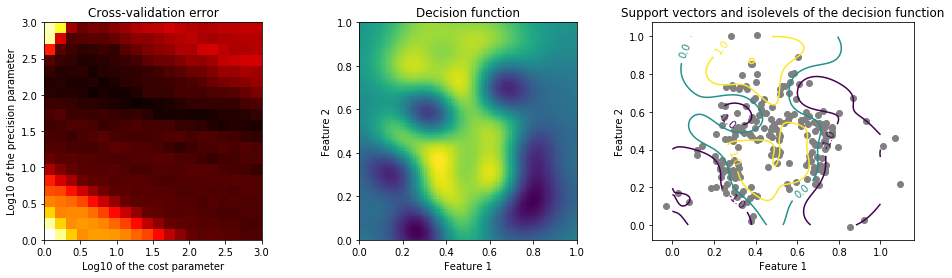

In [6]:
# Sample points on a grid
num_points = 100
x_rng = np.linspace(0, 1, num_points)
y_rng = np.linspace(0, 1, num_points)
grid_x, grid_y = np.meshgrid(x_rng, y_rng)

# Evaluate decision function for each point
xy_list = np.column_stack((grid_x.flat, grid_y.flat))
values = svm.decision_function(xy_list)
values = values.reshape((num_points, num_points))

# Display
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Cross-validation error")
ax.set_xlabel("Log10 of the cost parameter")
ax.set_ylabel("Log10 of the precision parameter")
# TODO (Question 1)
ax.imshow(cv_error,extent=[0, 3, 0, 3], origin='lower',cmap='hot')

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.imshow(values, extent=[0, 1, 0, 1], origin='lower')


ax = fig.add_subplot(1, 3, 3)
ax.set_title("Support vectors and isolevels of the decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# TODO (Question 2)
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], c='grey')
#for i in range(len(grid_x)):
 #   for j in range(len(grid_x)):
  #      if values[i,j]>
cs=ax.contour(grid_x,grid_y,values,[-1.0,.0,1.0])

ax.clabel(cs,inline=1,fmt='%1.1f')
ax.legend()


plt.show()

## Generalization error

### Load the test data

In [7]:
# Load the training data
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")
print(test_features.shape)
print(test_labels.shape)

(500, 2)
(500,)


### Print the number of misclassified points in the test set

In [8]:
# TODO (Question 3)
test_y=svm.predict(test_features)            
mis=0
for z in range(len(test_features)):
    if test_y[z] != test_labels[z]:
        mis+=1
            #print(mislabled)

print(mis)


90
